In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import scipy.fft as fft
from IPython.display import HTML
import time

# <center> Fourier transform and physics Part II </center>

In this notes, we shall be solving our first dynamical system: the heat equation,
\begin{equation}
\dfrac{\partial u}{\partial t} = \alpha \dfrac{\partial^2 u}{\partial x^2}
\end{equation}

Since we are going to evolve data in time, we will also learn how to animate in this notes.

Whenever the heat equation acts on a solution $u(x,t)$ with compact support, one must supply additional conditions at the boundaries. Here, we shall be considering two types of those boundary conditions: Dirichlet boundary conditions, and Neumann boundary conditions. Explicitly, we shall be solving the following two types of systems,
\begin{equation}
\dfrac{\partial u}{\partial t} = \alpha \dfrac{\partial^2 u}{\partial x^2}, \qquad u(x,0) = f(x), \qquad u(0,t) = a, u(1,t) = b,
\end{equation}
where we require
\begin{equation}
f(0) = a, \qquad f(1) = b,
\end{equation}
and another system given by
\begin{equation}
\dfrac{\partial u}{\partial t} = \alpha \dfrac{\partial^2 u}{\partial x^2}, \qquad u(x,0) = f(x), \qquad \dfrac{\partial u(0,t)}{\partial x} = \dfrac{\partial u(1,t)}{\partial x} = 0.
\end{equation}
These two systems correspond roughly to the evolution of a rod kept at a certain temperature at both ends (say, being in contact with a heat bath of some temperature $a$ and $b$), or the evolution of an insulated rod with some initial heat distribution.

As we shall see, these two problems may be solved numerically for any initial distribution satisfying the boundary conditions using discrete sine and discrete cosine transforms.

## <center> Separation of variables </center>

The main technique we shall be employing is separation of variables,
\begin{equation}
u(x,t) = X(x)T(t)
\end{equation}
The heat equation reduces to
\begin{equation}
\dfrac{1}{\alpha T}\dfrac{d T}{dt} = \dfrac{1}{X} \dfrac{d^2 X}{dx^2}
\end{equation}
Because the left and right hand sides may be varied, being dependent on different independent variables, this implies that
\begin{equation}
\dfrac{1}{\alpha T}\dfrac{d T}{dt} = k, \qquad \dfrac{1}{X} \dfrac{d^2 X}{dx^2} = k
\end{equation}
We shall consider three cases.
___
### <center> $k > 0$ </center>
Let $\lambda^2 = k$. One should be able to show that whenever $k > 0$, our solutions look like
\begin{equation}
X_\lambda(x) = A_\lambda \exp (\lambda x) + B_\lambda \exp (-\lambda x), \qquad T_\lambda(t) = \exp( \alpha \lambda^2 t)
\end{equation}
___
### <center> $k = 0$ </center>
Whenever $k = 0$, our solutions look like
\begin{equation}
X_0(x) = A_0 + B_0 x, \qquad T_0(t) = 1
\end{equation}
___
### <center> $k < 0$ </center>
Let $\mu^2 = - k$. One should be able to show that whenever $k < 0$, our solutions look like
\begin{equation}
X_{\mu}(x) = A_{\mu} cos (\mu x) + B_{\mu} sin(\mu x), \qquad  T_{\mu}(t) = \exp ( - \alpha \mu^2 t )
\end{equation}
## <center> Solving the Dirichlet problem </center>
Let us first solve the $k = 0$ solution. This simplifies the problem significantly, since we may peal away this particular part of the problem to yield an easier set of boundary conditions.

When looking at the solutions for which $k = 0$, the boundary conditions imply
\begin{equation}
u_0(0,t) = A_0 = a, \qquad u_0(1,t) = A_0 + B_0 = b
\end{equation}
It should be clear that the solutions are given by
\begin{equation}
u_0(x,t) = a + (b-a) x
\end{equation}

Now, if we either look at
\begin{equation}
u(x,t) = u_0(x,t) + \sum_\lambda C_\lambda u_\lambda(x,t)
\end{equation}
or
\begin{equation}
u(x,t) = u_0(x,t) + \sum_\mu C_\mu u_\mu(x,t)
\end{equation}
it is clear that the boundary conditions which $u_\lambda(x,t)$ and $u_\mu(x,t)$ must satisfy is given now by
\begin{equation}
u_\lambda(0,t) = u_\mu(0,t) = u_\lambda(1,t) = u_\mu(1,t) = 0
\end{equation}

___

When looking at the solutions for which $k > 0$, the boundary conditions imply
\begin{equation}
u_\lambda(0,t) = (A_\lambda + B_\lambda)\exp( \alpha \lambda^2 t) = 0, \qquad u(1,t) = (A_\lambda exp(\lambda) + B_\lambda \exp(-\lambda))\exp( \alpha \lambda^2 t) = 0
\end{equation}
It should be clear that if this is to be satisfied for all time, $A_\lambda = B_\lambda = 0$.
___
When looking at the solutions for which $k < 0$, the boundary conditions imply
\begin{equation}
u_\mu(0,t) = (A_\mu) \exp( - \alpha \mu^2 t) = 0,
\end{equation}
which yields us $A_\mu = 0$, and
\begin{equation}
u_\mu(1,t) = B_\mu \sin(\mu t) \exp (- \alpha \mu^2 t) = 0,
\end{equation}
which gives us the condition that
\begin{equation}
\mu = n \pi, \qquad n = 1,2,3,\dots.
\end{equation}
Thus, the general solution of the Dirichlet problem is of the form
\begin{equation}
u(x,t) = a + (b-a) x + \sum_{n = 1}^\infty C_n \sin( n \pi x) \exp( - \alpha n^2 \pi^2 t)
\end{equation}
The particular solution is supplied by the final boundary condition, the initial heat distribution at $t = 0$,
\begin{equation}
u(x,0) = f(x) = a + (b-a) x + \sum_{n = 1}^\infty C_n \sin (n \pi x).
\end{equation}
Rearranging this, we see that this is just a discrete sine transformation problem,
\begin{equation}
f(x) - a - (b-a)x = \sum_{n = 1}^\infty C_n \sin(n \pi x),
\end{equation}
to get the list of coefficients $C_n$.

### <center> Numerical solution of the Dirichlet problem </center>
In this section we shall be solving the heat equation with Dirichlet boundary conditions. We shall be using a function that generates a snapshot of the heat distribution at each time step, so that we can use it for animation later on.

In [2]:
def heat_dirichlet(x, f, h):
    """
    Solves the heat equation, given by u(x,0) = f(x).
    
    Yields the heat distribution u_new sequentially at each time step, with a time step given by h
    """
    yield x,f #return initial distribution
    
    #Solve u0 solution
    a = f[0]
    b = f[-1]
    u0 = a + (b-a)*x
    
    #Discrete sine transformation of f(x) - u0(x,t)
    c = fft.dst(f - u0)
    N = c.shape[0]
    
    #Generate list of how each coefficient evolves after each time step
    exps = np.zeros(N)
    for i in range(N):
        exps[i] = np.exp(- (i+1)**2 * np.pi**2 * h)
        
    #First time step
    c_new = exps * c
    
    while True:
        u_new = fft.idst(c_new) + u0
        yield (x, u_new)
        c_new = exps * c_new
    

With the function above, we should be able to make snapshots of the heat distribution at each time step, give by a step size $h$. Let us consider an initial distribution of heat given by,
\begin{equation}
f(x) = \left\lbrace
\begin{matrix}
1 & x < 1/2 \\
0 & x \geq 1/2
\end{matrix}
\right.
\end{equation}

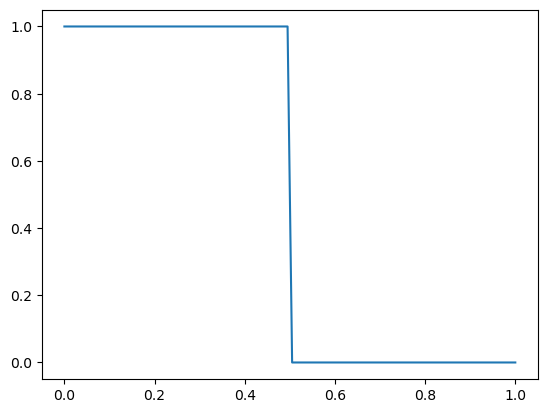

In [3]:
N = 1_00
x = np.linspace(0,1,N)
f = (np.sign(1/2-x)+1)/2

plt.plot(x, f)
plt.show()

Let us look at what the heat distribution looks like every 0.5 seconds.

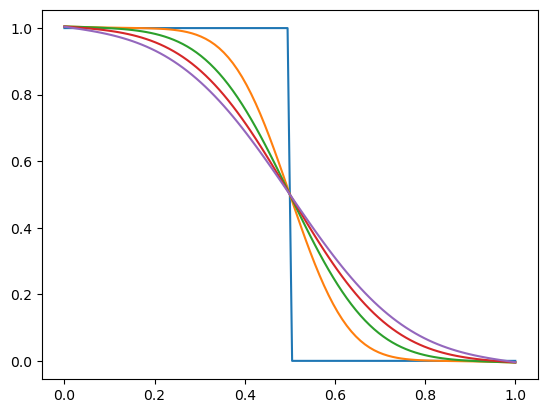

In [4]:
evolution = heat_dirichlet(x, f,0.005)
for _ in range(5):
    x,u = next(evolution)
    plt.plot(x,u)

Now, let us turn to the task of animating this. We may use matplotlib's animation library, specifically FuncAnimation. A very basic implementation is as follows.

The key idea is that FuncAnimation expects in its second input a function that just calls the nth frame. Unless we wish to solve the entire evolution on the spot, plot(n) must somehow remember the (n-1)th frame, and evolve it to the next frame.

This is essentially done by the generator.

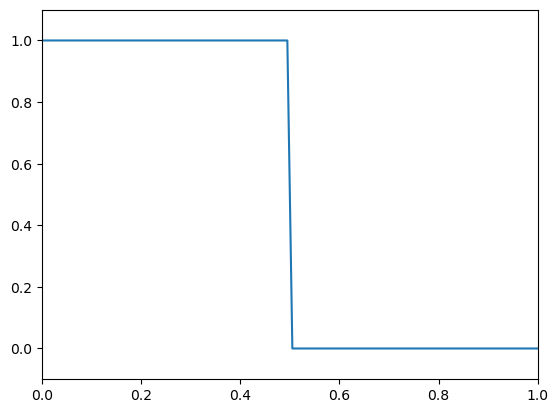

In [5]:
fig = plt.figure()
ax = plt.axes(xlim = (0,1), ylim = (-0.1,1.1))
temp, = ax.plot([],[])
data = heat_dirichlet(x,f,0.005)

def get_plot(data_gen):
    def plot(n):
        x, y = next(data_gen)
        temp.set_data(x,y)
        return temp,
    return plot

plot_func = get_plot(data)

ani = anim.FuncAnimation(fig, plot_func, frames=10, interval = 100, blit = True)

To animate this in a Jupyter notebook, it's sufficient to convert it into an HTML5 video

In [12]:
HTML(ani.to_html5_video())

Let's add some text.

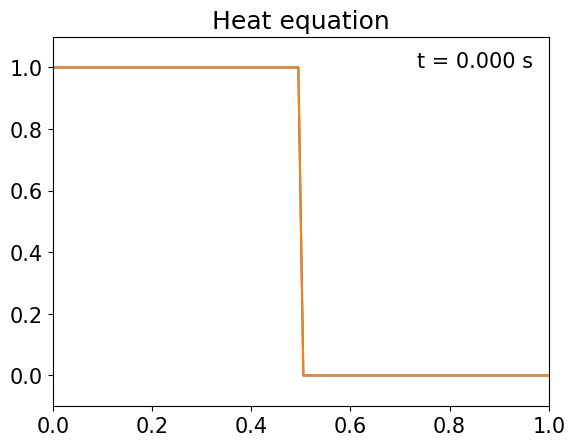

In [20]:
def heat_dirichlet_t(x, f, h):
    """
    Solves the heat equation, given by u(x,0) = f(x).
    
    Yields the heat distributionu_new sequentially at each time step, with a time step given by h
    """
    yield (0,x,f) #return initial distribution
    
    #Solve u0 solution
    a = f[0]
    b = f[-1]
    u0 = a + (b-a)*x
    
    #Discrete sine transformation of f(x) - u0(x,t)
    c = fft.dst(f - u0)
    N = c.shape[0]
    
    #Generate list of how each coefficient evolves after each time step
    exps = np.zeros(N)
    for i in range(N):
        exps[i] = np.exp(- (i+1)**2 * np.pi**2 * h)
        
    #First time step
    c_new = exps * c
    
    k = 1
    while True:
        u_new = fft.idst(c_new) + u0
        yield (k*h, x, u_new)
        c_new, k = exps * c_new, k + 1

fig = plt.figure()
ax = plt.axes(xlim = (0,1), ylim = (-0.1,1.1), title = "Heat equation")
plt.rcParams.update({'font.size': 15})
temp0, = ax.plot(x,f)
temp, = ax.plot([],[])
time_text = ax.text(0.735, 1, '')
data = heat_dirichlet_t(x,f,0.0005)

def get_plot(data_gen):
    def plot(n):
        t,x,y = next(data_gen)
        temp.set_data(x,y)
        time_text.set_text('t = {0:.3f} s'.format(t))
        return (temp,time_text)
    return plot

plot_func = get_plot(data)

ani = anim.FuncAnimation(fig, plot_func, frames=200, interval = 20, blit = True)

In [14]:
HTML(ani.to_html5_video())

### <center> Solving the Neumann problem </center>

Unlike the Dirichlet problem, where we had to solve the $k = 0$ solution first before looking at the $k > 0$ and $k < 0$ solutions, we may do them in any order with the Neumann problem.

For $k > 0$ solutions, the boundary conditions imply the following constraints for $A_\lambda$ and $B_\lambda$,
\begin{equation}
\partial_x u_\lambda(0,t) = \lambda(A_\lambda - B_\lambda)\exp(- \alpha \lambda^2 t) = 0, \qquad \partial_x u_\lambda(1,t) = \lambda (A_\lambda \exp(\lambda) - B_\lambda \exp(-\lambda))\exp (- \alpha \lambda^2 t) = 0
\end{equation}
One should be able to convince yourselves that for this to be true at all times, $A_\mu = B_\mu = 0$.

___
For the $k = 0$ solution, the boundary conditions imply
\begin{equation}
\partial_x u_0(0,t) = B_0 = 0, \qquad \partial_x u_0(1,t) = B_0 = 0
\end{equation}
Thus, $u_0(x,t) = A_0$.
___
For the $k < 0$ solution, the boundary conditions imply at $x = 0$
\begin{equation}
\partial_x u_0(0,t) = B_\mu \mu \exp( - \alpha \mu^2 t) = 0, \qquad B_\mu = 0,
\end{equation}
and the boundary conditions imply at $x = 1$
\begin{equation}
\partial_x u_0(1,t) = A_\mu \mu \sin(\mu) \exp(- \alpha \mu^2 t) = 0, \qquad \mu = n \pi, \qquad n = 1,2,3,\dots
\end{equation}
___
Thus, the general solution is given by
\begin{equation}
u(x,t) = A_0 + \sum_{n = 1}^\infty A_n \cos(n \pi x) \exp(- \alpha n^2 \pi^2 t),
\end{equation}
and the particular solution, given by the initial value at $t = 0$, is obtained by a discrete cosine transformation,
\begin{equation}
u(x,0) = f(x) = \sum_{n = 0}^\infty A_n \cos(n \pi x).
\end{equation}
### <center> Numerical solution of the Neumann problem </center>
We will proceed as before, writing a generator that calculates each temperature distribution at each time step

In [9]:
def heat_neumann(x, f, h):
    """
    Solves the heat equation, given by u(x,0) = f(x).
    
    Yields the heat distribution u_new sequentially at each time step, with a time step given by h
    """
    yield x,f #return initial distribution
    
    #Discrete cosine transformation of f(x)
    c = fft.dct(f)
    N = c.shape[0]
    
    #Generate list of how each coefficient evolves after each time step
    exps = np.zeros(N)
    for i in range(N):
        exps[i] = np.exp(- i**2 * np.pi**2 * h)
        
    #First time step
    c_new = exps * c
    
    while True:
        u_new = fft.idct(c_new)
        yield (x, u_new)
        c_new = exps * c_new

Let's see what happens every 0.05 seconds

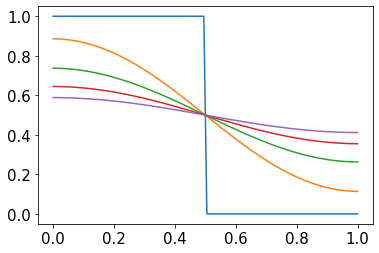

In [10]:
evolution = heat_neumann(x, f,0.05)
for _ in range(5):
    x,u = next(evolution)
    plt.plot(x,u)

Now we animate

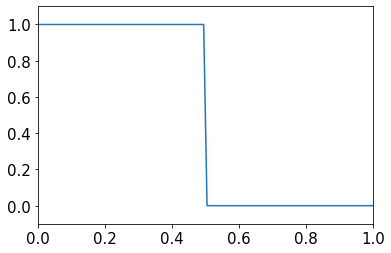

In [11]:
fig = plt.figure()
ax = plt.axes(xlim = (0,1), ylim = (-0.1,1.1))
temp, = ax.plot([],[])
data = heat_neumann(x,f,0.005)

def get_plot(data_gen):
    def plot(n):
        x, y = next(data_gen)
        temp.set_data(x,y)
        return temp,
    return plot

plot_func = get_plot(data)

ani = anim.FuncAnimation(fig, plot_func, frames=10, interval = 100, blit = True)

In [12]:
HTML(ani.to_html5_video())

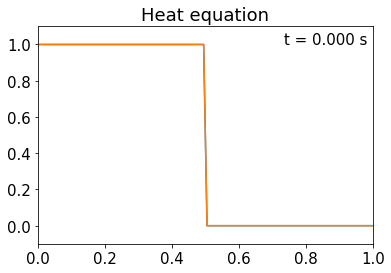

In [13]:
def heat_neumann_t(x, f, h):
    """
    Solves the heat equation, given by u(x,0) = f(x).
    
    Yields the heat distribution u_new sequentially at each time step, with a time step given by h
    """
    yield 0,x,f #return initial distribution
    
    #Discrete cosine transformation of f(x)
    c = fft.dct(f)
    N = c.shape[0]
    
    #Generate list of how each coefficient evolves after each time step
    exps = np.zeros(N)
    for i in range(N):
        exps[i] = np.exp(- i**2 * np.pi**2 * h)
        
    #First time step
    c_new = exps * c
    
    k = 1
    while True:
        u_new = fft.idct(c_new)
        yield (h*k, x, u_new)
        
        c_new, k = exps * c_new, k + 1

fig = plt.figure()
ax = plt.axes(xlim = (0,1), ylim = (-0.1,1.1), title = "Heat equation")
plt.rcParams.update({'font.size': 15})
temp0, = ax.plot(x,f)
temp, = ax.plot([],[])
time_text = ax.text(0.735, 1, '')
data = heat_neumann_t(x,f,0.0005)

def get_plot(data_gen):
    def plot(n):
        t,x,y = next(data_gen)
        temp.set_data(x,y)
        time_text.set_text('t = {0:.3f} s'.format(t))
        return (temp,time_text)
    return plot

plot_func = get_plot(data)

ani = anim.FuncAnimation(fig, plot_func, frames=500, interval = 20, blit = True)

In [14]:
HTML(ani.to_html5_video())